# ccClub-教育平台專案 網路爬蟲



##### Copyright

Licensed under the MIT License

In [ ]:
# MIT License

# Copyright (c) 2020 Colleabois, yung-chun

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

## 安裝套件

美觀用的：

In [ ]:
from IPython import display # Some of the output are just too long and too ugly so need this to adjust the display 
!pip install -q gwpy # T

     |████████████████████████████████| 1.4MB 5.6MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 2.6MB 19.0MB/s 


Selenium 需要下載額外的驅動程式，這些都是設定

In [ ]:
%%capture 
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

程式碼需要的 packages 跟 driver 的條件設定

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver import ActionChains # in order to perform clicks
# Options setup for chrome
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#第一次嘗試

課程封面頁有三個評論，只截取評論開頭 20 字證明真的有爬到

In [ ]:
url1 = 'https://hahow.in/courses/5bdaafa726b5640020754649/main'
mydriver1 = webdriver.Chrome('chromedriver', options=chrome_options)
gettingurl1 = mydriver1.get(url1)
time.sleep(3)
source1 = mydriver1.page_source
soup1 = BeautifulSoup(source1, 'html.parser')

comments1 = soup1.find_all('div',{'class':'wei2cc-1 gUylJK marg-b-25'})
nc = 0
for comment in comments1:
  nc+=1
  print('=='+str(nc)+'===============================')
  starRating = comment.find('p',{'class':'marg-b-0'})
  print(starRating.text[:20]+'...')

==1===============================
這是我在hahow第二次上課，購課前有過...
==2===============================
這門課程的教學方式，我很喜歡。老師的教法...
==3===============================
即使是完全沒有任何程式基礎的人也可以上的...


在網頁原始碼中找到「看更多」按鈕的位置（**XPATH**）
```
<button class="sc-1a6j6ze-0 cYdxxq b21euj-2 gMMXlv">看更多</button>
```


#第二次嘗試

用 Selenium 找到並按下按鍵

In [ ]:
url2 = 'https://hahow.in/courses/5bdaafa726b5640020754649/main'
mydriver2 = webdriver.Chrome('chromedriver', options=chrome_options)
gettingurl2 = mydriver2.get(url2)
time.sleep(3)
source2_1 = mydriver2.page_source
soup2_1 = BeautifulSoup(source2_1, 'html.parser')
seeMoreButton = mydriver2.find_elements_by_xpath("//button[@class='sc-1a6j6ze-0 cYdxxq b21euj-2 gMMXlv']")[0] # 看更多
seeMoreButton.click()
time.sleep(3)
source2_2 =  mydriver2.page_source
soup2_2 = BeautifulSoup(source2_2, 'html.parser')

print(">>> 按之前")
comments2_1 = soup2_1.find_all('div',{'class':'wei2cc-1 gUylJK marg-b-25'})
nc = 0
for comment in comments2_1:
  nc+=1
  print('=='+str(nc)+'===============================')
  starRating = comment.find('p',{'class':'marg-b-0'})
  print(starRating.text[:20]+'...')

print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
print(">>> 按之後")
comments2_2 = soup2_2.find_all('div',{'class':'wei2cc-1 gUylJK marg-b-25'})
nc = 0 # reinitialize nc
for comment in comments2_2:
  nc+=1
  print('=='+str(nc)+'===============================')
  starRating = comment.find('p',{'class':'marg-b-0'})
  print(starRating.text[:20]+'...')

>>> 按之前
==1===============================
這是我在hahow第二次上課，購課前有過...
==2===============================
這門課程的教學方式，我很喜歡。老師的教法...
==3===============================
即使是完全沒有任何程式基礎的人也可以上的...
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
>>> 按之後
==1===============================
這是我在hahow第二次上課，購課前有過...
==2===============================
這門課程的教學方式，我很喜歡。老師的教法...
==3===============================
即使是完全沒有任何程式基礎的人也可以上的...
==4===============================
課程簡單易懂，教材資料整理的也很完整，學...
==5===============================
個人的第一堂Python的學習課程，
轉...
==6===============================
能很容易的了解基本語法、架構，剩下的就是...
==7===============================
這堂課可以配合考取TQC-Python證...
==8===============================
上課內容搭配實際操作範例
非常容易就能了...
==9===============================
對於沒接觸過程式語言的新手來說非常好懂，...
==10===============================
讚喔...
==11===============================
老師都會回復問題很快速,這一點大推!!!...
==12===============================
即使是完全沒有任何程式基礎的人也可以上的...
==13===============================
老師講解的很仔細清楚，超級

按下按鈕後爬出更多評論了


#第三次嘗試

想連續按下兩次按鍵一直不成功，所以把按下按紐後的 soup 印出來，發現竟然跟按之前一樣？？？

<html data-react-helmet="lang" lang="zh-TW" style="width: calc(100% - 15px); position: fixed; top: -2734px; overflow: auto;">
 <head>
  <link data-react-helmet="true" href="https://hahow.in/courses/5bdaafa726b5640020754649" rel="canonical"/>
  <script async="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script data-react-helmet="true" type="application/ld+json">
   {"@context":"https://schema.org/","@type":"Product","name":"Python 入門特訓 - 基礎實作到證照攻略","image":"https://images.api.hahow.in/images/5c6639d091da6d0020766b1f","description":"Python 證照攻略課程，教你 Python 的程式語法與 Python 證照攻略，循序漸進學習 Python 開發環境的建置。同時也將教你 TQC 和 Python 認證考試的攻略要點，由淺入深掌握 Python 證照攻略。","productID":"5bdaafa726b5640020754649","offers":{"price":1490,"priceCurrency":"TWD","availability":"InStock"}}
  </script>
  <script data-react-helmet="true" type="application/ld+json">
  
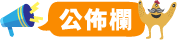
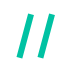
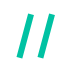
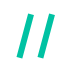
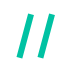
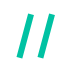
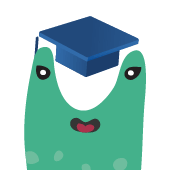

None

<IPython.core.display.Javascript object>

In [ ]:
url3 = 'https://hahow.in/courses/5bdaafa726b5640020754649/main'
mydriver3 = webdriver.Chrome('chromedriver', options=chrome_options)
gettingurl3 = mydriver3.get(url3)
time.sleep(3)
seeMoreButton3 = mydriver3.find_elements_by_xpath("//button[@class='sc-1a6j6ze-0 cYdxxq b21euj-2 gMMXlv']")[0] # 看更多
seeMoreButton3.click()
time.sleep(3)
source3_2 =  mydriver3.page_source
soup3_2 = BeautifulSoup(source3_2, 'html.parser')
display.display(print(soup3_2.prettify())) # Display the output of html
display.Javascript("google.colab.output.setIframeHeight('300px');") # Adjust the output height

我找了一些資料

[Action Chain](https://www.selenium.dev/selenium/docs/api/py/webdriver/selenium.webdriver.common.action_chains.html)

[Find hidden object](https://stackoverflow.com/questions/45246280/selenium-drivers-page-source-different-than-browser)

[Maybe try this too](https://www.reddit.com/r/learnprogramming/comments/4mwh03/python_selenium_webdriver_page_source_not_getting/)
```python
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
driver = webdriver.Chrome()
driver.get('the website url')
wait = WebDriverWait(driver, 10)
element = wait.until(EC.element_to_be_clickable((By.ID, 'my_video_1_html5_api')))
html_code = driver.find_element('id','my_video_1_html5_api').get_attribute('src')
print(html_code)
```

#第四次嘗試

我以為這樣可以按很多下，但其實沒有，結果還是跟只有按一下一樣，目前也不知道原因

In [ ]:
url4 = 'https://hahow.in/courses/5bdaafa726b5640020754649/main'
mydriver4 = webdriver.Chrome('chromedriver', options=chrome_options)
gettingurl4 = mydriver4.get(url4)
time.sleep(3)

actions = ActionChains(mydriver4)
for i in range(3): # 這邊可以改數字 
  seeMoreButton4 = mydriver4.find_elements_by_xpath("//button[@class='sc-1a6j6ze-0 cYdxxq b21euj-2 gMMXlv']")[0] # 看更多
  print(seeMoreButton4)
  actions.click(seeMoreButton4)
  print('Button pressed '+str(i+1)+' times.')
  actions.perform()
  time.sleep(3)

source4 =  mydriver4.page_source
soup4 = BeautifulSoup(source4, 'html.parser')

print(">>> After pressing button")
comments4_2 = soup4.find_all('div',{'class':'wei2cc-1 gUylJK marg-b-25'})
nc = 0 # reinitialize nc
for comment in comments4_2:
  nc+=1
  print('=='+str(nc)+'===============================')
  starRating = comment.find('p',{'class':'marg-b-0'})
  print(starRating.text[:20]+'...')

<selenium.webdriver.remote.webelement.WebElement (session="1e56831ef2d5c58028be2e287daa65be", element="be89554f-30e5-4a65-9e7c-aa64614f340f")>
Button pressed 1 times.
<selenium.webdriver.remote.webelement.WebElement (session="1e56831ef2d5c58028be2e287daa65be", element="be89554f-30e5-4a65-9e7c-aa64614f340f")>
Button pressed 2 times.
<selenium.webdriver.remote.webelement.WebElement (session="1e56831ef2d5c58028be2e287daa65be", element="be89554f-30e5-4a65-9e7c-aa64614f340f")>
Button pressed 3 times.
>>> After pressing button
==1===============================
這是我在hahow第二次上課，購課前有過...
==2===============================
這門課程的教學方式，我很喜歡。老師的教法...
==3===============================
即使是完全沒有任何程式基礎的人也可以上的...
==4===============================
課程簡單易懂，教材資料整理的也很完整，學...
==5===============================
個人的第一堂Python的學習課程，
轉...
==6===============================
能很容易的了解基本語法、架構，剩下的就是...
==7===============================
這堂課可以配合考取TQC-Python證...
==8===============================
上課內容搭配實際操作範例
非常容易就能了...
=

我突然發現有另外一個網址會直接秀評論（把原網址末端的 main 換成 feedbacks）

#第五次嘗試

換網址在前一個嘗試會出問題，從參考資料中，我發現 ActionChain 這個東西，經過幾次測試，得到以下行得通的版本！ While 迴圈的部分參考了詠鈞的想法。


In [ ]:
url5 = 'https://hahow.in/courses/5bdaafa726b5640020754649/feedbacks'
mydriver5 = webdriver.Chrome('chromedriver', options=chrome_options)
gettingurl5 = mydriver5.get(url5)
time.sleep(3)

haveButton = True
t = 0
while haveButton == True:
  try: # when there is the continue button
    actions5 = ActionChains(mydriver5)
    seeMoreButton5 = mydriver5.find_elements_by_xpath("//button[@class='sc-1a6j6ze-0 cYdxxq b21euj-2 gMMXlv']")[0] # 看更多
    print(seeMoreButton5)
    actions5.click(seeMoreButton5)
    t+=1
    print('Button pressed '+str(t)+' times.')
    actions5.perform()
    time.sleep(3)
  except:
    print('End of pressing.')
    haveButton = False 

source5 =  mydriver5.page_source
soup5 = BeautifulSoup(source5, 'html.parser')
print(">>> After pressing button")
comments5 = soup5.find_all('div',{'class':'wei2cc-1 gUylJK marg-b-25'})
nc = 0 # reinitialize nc
for comment in comments5:
  nc+=1
  print('=='+str(nc)+'===============================')
  starRating = comment.find('p',{'class':'marg-b-0'})
  print(starRating.text[:20]+'...')

#display.display(print(soup5.prettify())) # Display the output of html
#display.Javascript("google.colab.output.setIframeHeight('300px');") 

<selenium.webdriver.remote.webelement.WebElement (session="68b448d5c9f46f67fb841b19d78eb460", element="8fbc5cac-1da4-4690-9be8-799f148ffa70")>
Button pressed 1 times.
<selenium.webdriver.remote.webelement.WebElement (session="68b448d5c9f46f67fb841b19d78eb460", element="19a2b78b-0de8-49b2-a43e-06ca551b6fcc")>
Button pressed 2 times.
<selenium.webdriver.remote.webelement.WebElement (session="68b448d5c9f46f67fb841b19d78eb460", element="480f54cb-8677-4e65-b1eb-585633557a25")>
Button pressed 3 times.
<selenium.webdriver.remote.webelement.WebElement (session="68b448d5c9f46f67fb841b19d78eb460", element="4774dd12-b16c-428c-b6f3-79193dfe3506")>
Button pressed 4 times.
<selenium.webdriver.remote.webelement.WebElement (session="68b448d5c9f46f67fb841b19d78eb460", element="951e3b4b-1b9b-41f0-b1bb-7279d7fbaeca")>
Button pressed 5 times.
<selenium.webdriver.remote.webelement.WebElement (session="68b448d5c9f46f67fb841b19d78eb460", element="ac7bdc77-28fd-491b-8d40-ed2cebce4ae1")>
Button pressed 6 times